In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### EDA or understanding the data

In [2]:
# Importing dataset
df = pd.read_csv('./data.csv')

In [3]:
# inspecting
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [4]:
df.shape

(99999, 27)

In [5]:
df.head(1)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [7]:
# checking for null values
df.isnull().sum()
# inference no null values

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [9]:
# Checking for duplicates
df.duplicated().sum()
# we have about 658 duplicates which implies these entries are identical to a previous row

658

In [10]:
# Extracting the duplicated rows
# df.loc[df.duplicated(keep=False),:]
# keep is used to see the duplicated rows

In [11]:
df.drop_duplicates(inplace=True)
# Dropping duplicates

In [12]:
df.duplicated().sum()
# cross checking

0

In [13]:
# Step 2 analysing each columns individually
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99341 non-null  bool  
 1   C1                99341 non-null  int64 
 2   banner_pos        99341 non-null  int64 
 3   site_id           99341 non-null  object
 4   site_domain       99341 non-null  object
 5   site_category     99341 non-null  object
 6   app_id            99341 non-null  object
 7   app_domain        99341 non-null  object
 8   app_category      99341 non-null  object
 9   device_id         99341 non-null  object
 10  device_ip         99341 non-null  object
 11  device_model      99341 non-null  object
 12  device_type       99341 non-null  int64 
 13  device_conn_type  99341 non-null  int64 
 14  C14               99341 non-null  int64 
 15  C15               99341 non-null  int64 
 16  C16               99341 non-null  int64 
 17  C17         

In [15]:
df['month'].value_counts()
# as this same throughout, has no unique values hence should be dropped
# also click should be dropped as we already have y

10    99341
Name: month, dtype: int64

In [16]:
df.drop(['month','click'],axis=1,inplace=True)

In [17]:
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [18]:
df['C1'].value_counts()
# This looks fine

1005    91213
1002     5489
1010     2263
1012      253
1007       93
1001       21
1008        9
Name: C1, dtype: int64

In [19]:
df['banner_pos'].value_counts()

0    71284
1    27888
7      107
2       30
4       19
5        9
3        4
Name: banner_pos, dtype: int64

In [20]:
df['site_id'].unique().size

1485

In [21]:
df['device_id'].unique().size
# remove

16801

In [22]:
df['app_id'].unique().size

1354

In [23]:
df['C14'].unique().size

1722

In [24]:
df['C15'].unique().size

8

In [25]:
df['C16'].unique().size

9

In [26]:
df['C16'].unique().size

9

In [27]:
df['C17'].unique().size

399

In [28]:
df['C18'].unique().size

4

In [29]:
df['C19'].unique().size

64

In [30]:
df['C19'].unique().size

64

In [31]:
df['C20'].unique().size

154

In [32]:
df['C21'].unique().size

60

In [33]:
df['app_category'].unique().size

21

In [34]:
df['app_domain'].unique().size

96

In [35]:
df['app_id'].unique().size

1354

In [36]:
df['app_category'].unique().size

21

In [37]:
df['app_domain'].unique().size

96

In [38]:
df['banner_pos'].unique().size

7

In [39]:
df['day'].unique().size

10

In [40]:
df['dayofweek'].unique().size

7

In [41]:
df['device_conn_type'].unique().size

4

In [42]:
df['device_id'].unique().size
# remove

16801

In [43]:
df['device_ip'].unique().size
# definetly remove+

78013

In [44]:
df['device_model'].unique().size

3145

In [45]:
df['device_type'].unique().size

4

In [46]:
df['site_category'].unique().size

19

In [47]:
df['site_domain'].unique().size

1331

In [48]:
df['site_id'].unique().size

1485

In [49]:
df.drop(['device_ip','device_id'],axis=1,inplace=True)

In [50]:
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

### Outlier detection in C1, C14-C21 Visualizing Numeric Values

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Creating dataset for numeric data
# sns.pairplot(df)
df_numeric = df.drop(['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'dayofweek', 'day', 'hour'],axis=1,inplace=False)

In [53]:
df_numeric.columns


Index(['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'y'], dtype='object')

In [54]:
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [55]:
# Pairplot of numeric data to determine the relation 
# sns.pairplot(df_numeric)
# Takes too long to run
# plt.show()


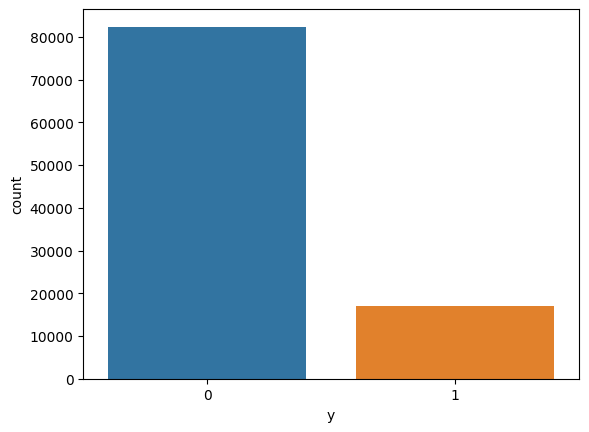

In [56]:
sns.countplot(x='y',data=df)
plt.show()
# highly imbalanced dataset most people did not click 

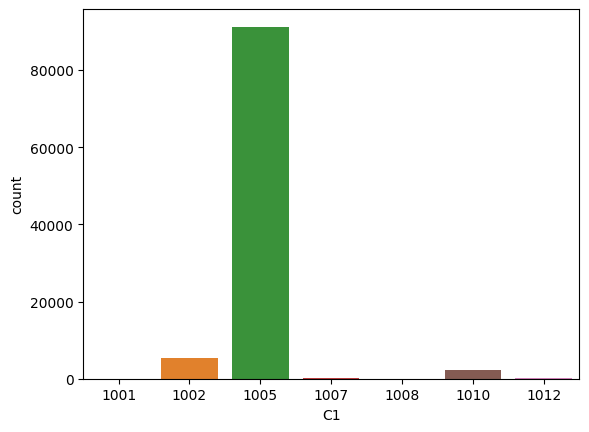

In [57]:
sns.countplot(x='C1',data=df)
plt.show()

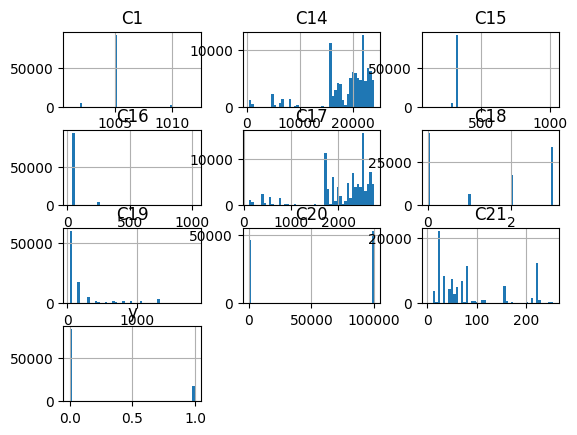

In [58]:
df_numeric.hist(bins=50)
plt.show()
# !!!! Continue data exploration

In [59]:
df_numeric.describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21,y
count,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000
mean,1004.967264,18846.561903,318.828882,60.338913,2113.226392,1.436627,226.056694,53294.197975,82.952185,0.170836
std,1.094744,4942.636368,21.578787,47.848698,607.163618,1.325966,350.392948,49952.107818,70.049904,0.376367
min,1001.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,0.000000
25%,1005.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,0.000000
50%,1005.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,0.000000
75%,1005.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,100.000000,0.000000
max,1012.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,1.000000


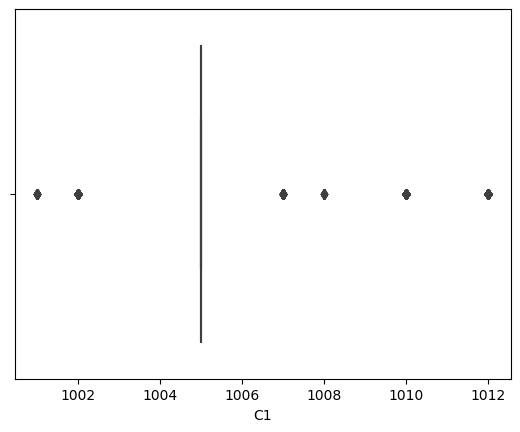

In [60]:
sns.boxplot(x=df_numeric['C1'])
plt.show()
# must be a discrete variable

In [61]:
df['C1'].value_counts()

1005    91213
1002     5489
1010     2263
1012      253
1007       93
1001       21
1008        9
Name: C1, dtype: int64

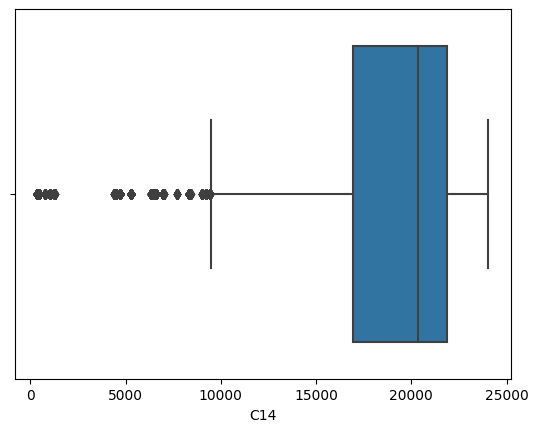

In [62]:
sns.boxplot(x=df['C14'])
plt.show()
# impute this since we do not have any information about this variable


In [63]:
# creating a function for outlier analysis
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1
  
  lower_limit= Q1 -1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  
  ls= df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
  
  return ls

In [64]:
# Creating a list to store output indices from multiples columns
index_list = []
for feature in ['C14']:
  index_list.extend(outliers(df,feature))

In [65]:
index_list
# indexes of the outliers

[40,
 51,
 58,
 59,
 87,
 114,
 144,
 151,
 156,
 170,
 174,
 176,
 195,
 210,
 220,
 223,
 242,
 248,
 254,
 313,
 314,
 333,
 338,
 348,
 358,
 364,
 369,
 371,
 399,
 403,
 417,
 429,
 447,
 448,
 455,
 460,
 481,
 484,
 504,
 507,
 517,
 522,
 537,
 549,
 572,
 574,
 581,
 601,
 640,
 692,
 699,
 729,
 750,
 781,
 785,
 792,
 794,
 798,
 799,
 820,
 829,
 836,
 849,
 855,
 861,
 883,
 895,
 908,
 918,
 932,
 938,
 950,
 954,
 962,
 981,
 984,
 991,
 1012,
 1038,
 1040,
 1070,
 1105,
 1119,
 1126,
 1128,
 1147,
 1169,
 1178,
 1210,
 1256,
 1266,
 1272,
 1276,
 1283,
 1290,
 1301,
 1347,
 1363,
 1365,
 1382,
 1407,
 1409,
 1415,
 1457,
 1465,
 1487,
 1489,
 1521,
 1528,
 1539,
 1555,
 1562,
 1565,
 1584,
 1606,
 1621,
 1624,
 1631,
 1649,
 1663,
 1668,
 1676,
 1700,
 1709,
 1727,
 1728,
 1738,
 1776,
 1791,
 1833,
 1843,
 1876,
 1877,
 1888,
 1892,
 1917,
 1935,
 1940,
 1951,
 1972,
 1981,
 2006,
 2010,
 2011,
 2028,
 2033,
 2047,
 2048,
 2051,
 2061,
 2067,
 2083,
 2103,
 2112,
 212

In [66]:
# Removing the ouliers
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [67]:
df_cleaned = remove(df,index_list)

In [68]:
df_cleaned.shape

(91170, 23)

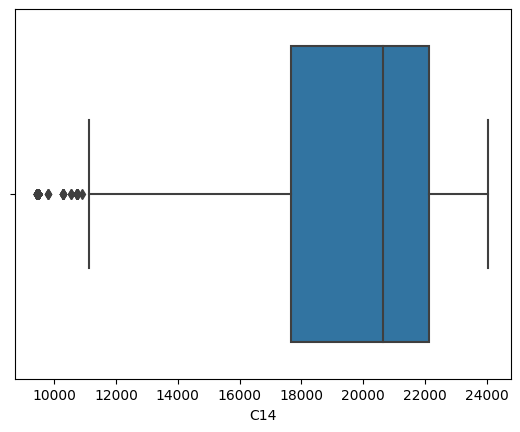

In [69]:
# cross check
sns.boxplot(x =df_cleaned['C14'])
plt.show()

In [70]:
# Finding the outliers
# lower_array =np.array((df['C14'] <= lower_limit))
# #upper bound
# upper_array = np.array((df['C14'] >= upper_limit))   
# 8171 / 99341 * 100
# around 8 percent of the data is in outliers

# C21 impute

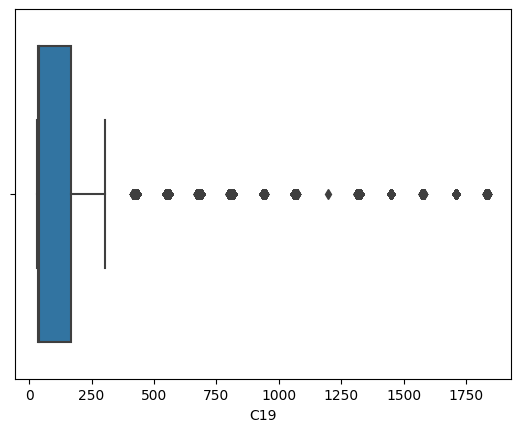

In [71]:
sns.boxplot(x=df_cleaned['C19'])
plt.show()
# # removing c19 , c17

In [72]:
# C1	C14	C15	C16	C17	C18	C19	C20	C21	
df_cleaned.drop(['C19','C17','C21'],inplace=True,axis=1)

# C15,C16 discrete
# C18 discrete
# C17,C19  contionous

In [73]:
df_cleaned.columns


Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C18', 'C20', 'dayofweek',
       'day', 'hour', 'y'],
      dtype='object')

### Categorical variables 

In [74]:
#  Find the categorical variables
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                91170 non-null  int64 
 1   banner_pos        91170 non-null  int64 
 2   site_id           91170 non-null  object
 3   site_domain       91170 non-null  object
 4   site_category     91170 non-null  object
 5   app_id            91170 non-null  object
 6   app_domain        91170 non-null  object
 7   app_category      91170 non-null  object
 8   device_model      91170 non-null  object
 9   device_type       91170 non-null  int64 
 10  device_conn_type  91170 non-null  int64 
 11  C14               91170 non-null  int64 
 12  C15               91170 non-null  int64 
 13  C16               91170 non-null  int64 
 14  C18               91170 non-null  int64 
 15  C20               91170 non-null  int64 
 16  dayofweek         91170 non-null  int64 
 17  day         

In [75]:
df['banner_pos'].value_counts()
# soo we need to convert banner positon as right now it is curently showing an order which does not exist So do one hot encoding

0    71284
1    27888
7      107
2       30
4       19
5        9
3        4
Name: banner_pos, dtype: int64

In [76]:
#  Overview
# One - hot encoding should be avoided when the data is too large(unique values) or the dataset are ordinal
#  Binary encoding vs Hashing either can be used to represent nominal categorical values
df_cleaned['app_category'].value_counts().count() #19
# Binary encoding

21

In [77]:
df['app_domain'].value_counts()
# Use Binary or hashing

7801e8d9    67194
2347f47a    12728
ae637522     4692
5c5a694b     2849
82e27996     1874
d9b5648e     1690
b9528b13     1593
0e8616ad     1455
b8d325c3     1286
df32afa9      723
aefc06bd      701
33da2e74      650
6f7ca2ba      543
5b9c592b      247
5c620f04      165
885c7f3f      152
45a51db4      151
b5f3b24a      123
813f3323       49
0654b444       45
c6824def       44
ad63ec9b       44
15ec7f39       38
99b4c806       31
828da833       23
a8b0bf20       22
43cf4f06       16
f2f777fb       16
448ca2e3       13
47464e95       12
2b627705       12
d6feb1a4       11
9ec164d3        8
27ee373d        7
3feeed1e        7
e5d5313f        7
6a0a3a9d        6
0d79ee56        5
b12ff13e        5
1ea19ec4        5
b51aefa8        5
b408d42a        5
db829551        4
dcdba109        4
7eec2ab0        4
ef1fc174        4
916026d9        3
e787a6bc        3
18eb4e75        3
7a9371fa        3
15c23f8e        3
2c1c31c6        2
bd8c1fdc        2
12aaf71f        2
d9e67b62        2
756ffb85  

In [78]:
df['site_domain'].value_counts().count()
# Use Binary or hashing

1331

In [79]:
df['site_category'].value_counts().count()
# Binary encoding


19

In [80]:
# site_id                91170 non-null  object
# y 3   site_domain       91170 non-null  object
# y 4   site_category     91170 non-null  object
#  5   app_id            91170 non-null  object
# y 6   app_domain        91170 non-null  object
#y  7   app_category      91170 non-null  object
#y  8   device_model      91170 non-null  object


In [81]:
df_cleaned['device_model'].value_counts().count()  
# use Nominal Binary encoding

3071

In [82]:
df['site_id'].value_counts().count() # id nominal in nature us Binary encoding

1485

In [83]:
df['app_id'].value_counts().count() #use binary encoding 
# as it is a combination of both one hot and hashing one hot increases dimensionality wheras hashing leads to loss of information

1354

In [84]:
df_cleaned.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C18,C20,dayofweek,day,hour,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,1,0,22683,320,50,0,100075,1,28,14,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,1,0,17037,320,50,2,-1,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,1,0,22155,320,50,3,100202,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,0,21591,320,50,3,100074,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,1,0,15708,320,50,0,-1,1,21,8,1


In [85]:
df['device_model'].value_counts()

8a4875bd    6032
1f0bc64f    3389
d787e91b    3344
76dc4769    1859
be6db1d7    1803
7abbbd5c    1608
a0f5f879    1598
4ea23a13    1579
ecb851b2    1498
d4897fef    1196
5096d134    1152
711ee120    1108
e1eae715    1067
1ccc7835     990
84ebbcd4     969
be74e6fe     954
c6263d8a     923
0eb711ec     916
981edffc     916
fce66524     911
3bd9e8e7     878
36b67a2a     872
f07e20f8     871
0bcabeaf     867
779d90c2     851
3bb1ddd7     848
5db079b5     763
aad45b01     745
158e4944     732
a5bce124     710
ef726eae     685
36d749e5     596
99e427c9     571
496515fa     563
2203a096     554
be87996b     549
2ea4f8ba     523
684581ce     473
43e7b962     471
5ec45883     446
24f6b932     444
cd5b1559     423
9e3836ff     406
6e1e2240     402
2891f384     393
2692a96a     389
c144e605     384
88fe1d5d     381
6332421a     377
04f5b394     366
e9b8d8d7     357
05e70df4     355
d6e0e6ff     352
cdf6ea96     340
8ce34352     336
4ceb2e0b     313
cad4c01d     310
08ac11ab     309
8b1aa260     3

### Analyzing the variables in respect to target variable


In [86]:
# target variable distributiom
df['y'].value_counts()/len(df)

0    0.829164
1    0.170836
Name: y, dtype: float64

In [87]:
# looking at the time variables
df['hour'].describe()

count    99341.000000
mean        11.310365
std          5.940158
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         23.000000
Name: hour, dtype: float64

In [88]:
df['hour'].head(25)

0     14
1     19
2     18
3     19
4      8
5     17
6      7
7     10
8     15
9     16
10    13
11     4
12    11
13    18
14    16
15    10
16     0
17    15
18     4
19     8
20     4
21     8
22    12
23    17
24    13
Name: hour, dtype: int64

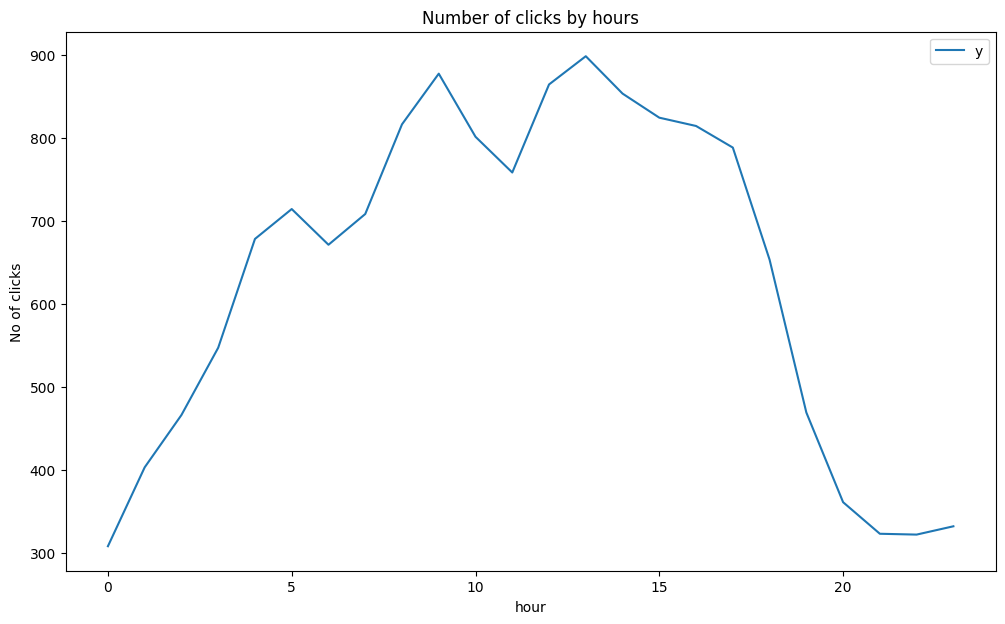

In [89]:
df_cleaned.groupby('hour').agg({'y':'sum'}).plot(figsize=(12,7))
plt.ylabel('No of clicks')
plt.title('Number of clicks by hours')
plt.show()
# We can see some peaks but the highest clicks occur btw 9 am and 3pm after that clicks start to drop 

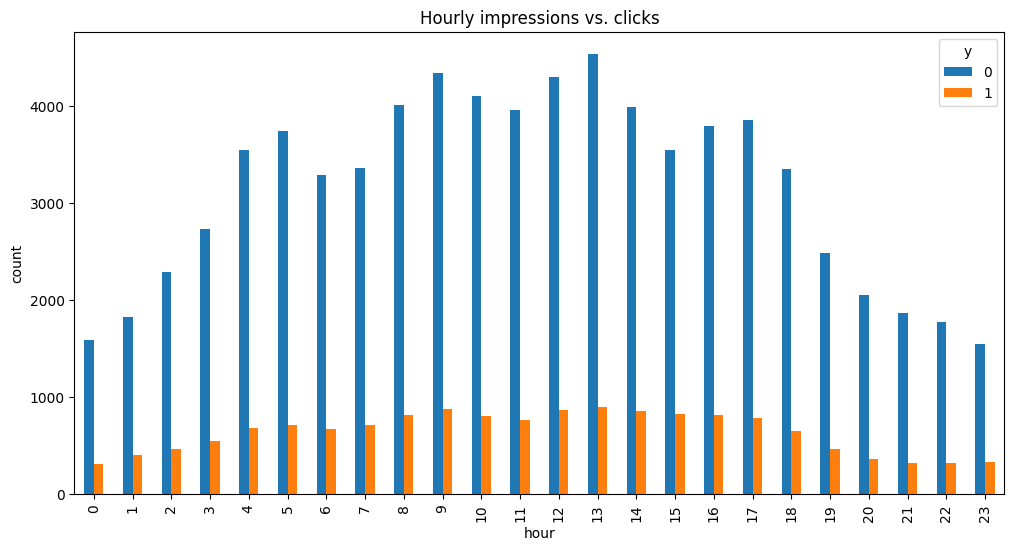

In [90]:
df_cleaned.groupby(['hour', 'y']).size().unstack().plot(kind='bar', title="Hour", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');
# This tells is that although impressions are high but clicks arenet which is common

##### Days

In [91]:
df_cleaned['dayofweek'].head(25)
# To understand the findings better I am temporary going to apply a lambda function to convert it 

0     1
1     2
2     3
3     2
4     1
5     3
6     3
7     3
8     5
9     4
10    2
11    6
12    5
13    4
14    3
15    2
16    5
17    6
18    1
19    1
20    2
21    2
22    3
23    3
24    2
Name: dayofweek, dtype: int64

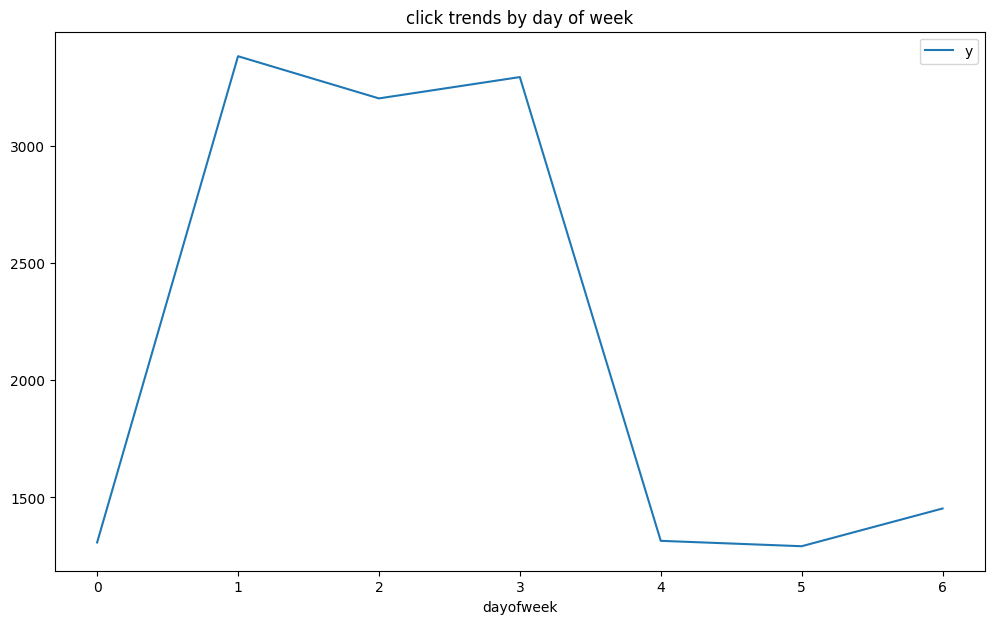

In [92]:
df_cleaned.groupby('dayofweek').agg({'y':'sum'}).plot(figsize=(12,7))
plt.title('click trends by day of week');
#  here 0 =  Mon ,1 = tues ....
# We can see that tues, wed and thur seem to have the highest number of clicks

Text(0.5, 1.0, 'Impressions Vs clicks')

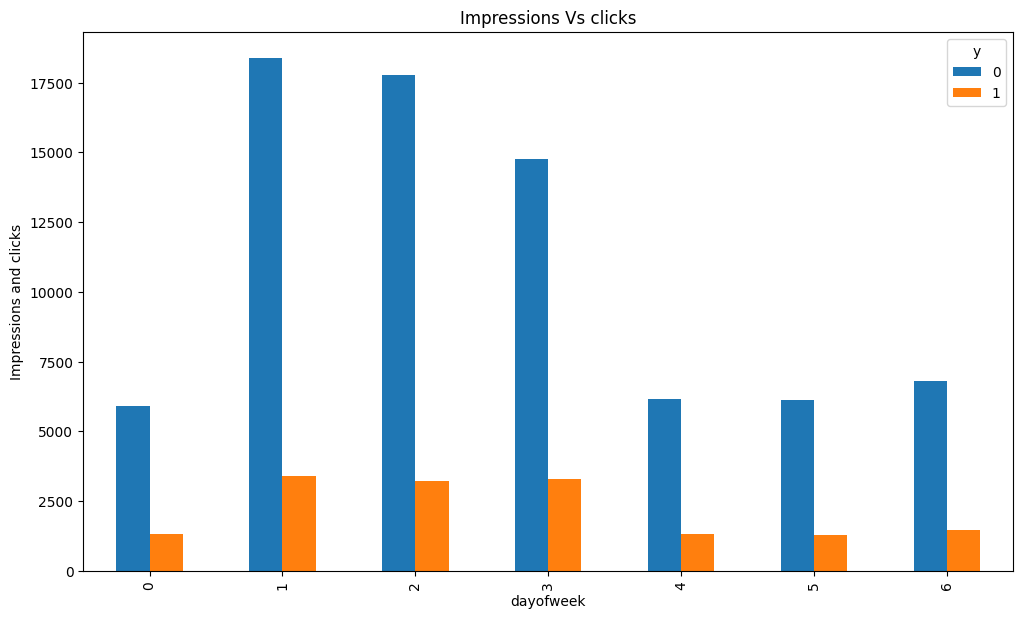

In [93]:
# Checking impressions vs the number of clicks
df_cleaned.groupby(['dayofweek','y']).size().unstack().plot(figsize=(12,7),kind='bar')
plt.ylabel('Impressions and clicks')
plt.title('Impressions Vs clicks')
#  Inference Tues, Wed and thur seem to have more number of clicks and impressions

#### Anonymized features .. seeing the distribution 

In [94]:
df_cleaned['C1'].value_counts()/len(df)
# 1005 has the most amount of the data

1005    0.846921
1002    0.044362
1010    0.022690
1012    0.002547
1007    0.000926
1001    0.000211
1008    0.000091
Name: C1, dtype: float64

<Axes: xlabel='C1'>

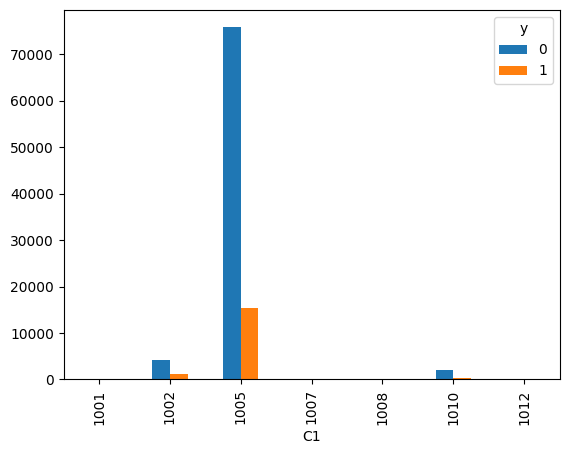

In [95]:
# Further analysis
df.groupby(['C1','y']).size().unstack().plot(kind='bar')

In [96]:
C1_values = df_cleaned.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=df_cleaned.loc[((df_cleaned.C1 == i))].y.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.09523809523809523
for C1 value: 1002,  click through rate: 0.22555026094849104
for C1 value: 1005,  click through rate: 0.16604464306938932
for C1 value: 1007,  click through rate: 0.03260869565217391
for C1 value: 1008,  click through rate: 0.0
for C1 value: 1010,  click through rate: 0.09804791481810116
for C1 value: 1012,  click through rate: 0.22924901185770752


#### Banner Position

In [97]:
df_cleaned['banner_pos'].value_counts()/len(df_cleaned)

0    0.719667
1    0.278546
7    0.001174
2    0.000318
4    0.000154
5    0.000099
3    0.000044
Name: banner_pos, dtype: float64

In [98]:
# finding out CTR
banner_pos = df['banner_pos'].unique()
banner_pos.sort()
ctr_avg_list =[]
banner_pos
for i in banner_pos:
  ctr_avg = df_cleaned[((df_cleaned['banner_pos'] == i))]['y'].mean()
  ctr_avg_list.append(ctr_avg)
  print('For banner postion{}, click through rate {}'.format(i,ctr_avg))

For banner postion0, click through rate 0.16454307138937999
For banner postion1, click through rate 0.1736956093719236
For banner postion2, click through rate 0.1724137931034483
For banner postion3, click through rate 0.25
For banner postion4, click through rate 0.07142857142857142
For banner postion5, click through rate 0.0
For banner postion7, click through rate 0.3177570093457944


Banner Position 0 has 72 % of data but only 16% CTR
But Postion 1 has 28% CTR 18 %
Position 7 has 0.01% CTR 31% so Banner 7 should be used more 

<Axes: xlabel='banner_pos'>

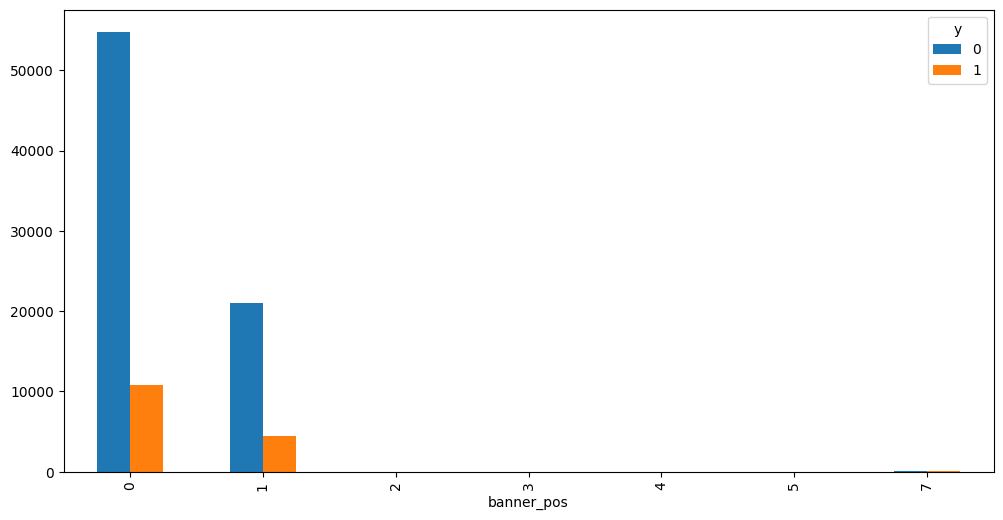

In [99]:
df_cleaned.groupby(['banner_pos','y']).size().unstack().plot(kind='bar',figsize=(12,6))

#### Site Features
#### site id

In [100]:
print('There are {} sites in the data set'.format(df_cleaned['site_id'].nunique()))
# Damm thats a lot of unique sites

There are 1362 sites in the data set


In [101]:
# top 10 sites with most impressions
print((df_cleaned['site_id'].value_counts()/len(df_cleaned))[0:10])

85f751fd    0.350115
1fbe01fe    0.172568
e151e245    0.059778
5b08c53b    0.025271
d9750ee7    0.023637
856e6d3f    0.020281
5b4d2eda    0.020105
a7853007    0.011791
b7e9786d    0.010299
6399eda6    0.008830
Name: site_id, dtype: float64


##### Key findings  85f751fd has 35 % of data

In [102]:
# Finding CTR for site_ids
top_ids = (df_cleaned['site_id'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_ids :
  click_avg = df_cleaned.loc[((df_cleaned['site_id']) == i)].y.mean()
  click_avg_list.append(click_avg)
  print("For site id value {}, click through rate: {}".format(i,click_avg))


For site id value 85f751fd, click through rate: 0.11337719298245615
For site id value 1fbe01fe, click through rate: 0.20307633636305855
For site id value e151e245, click through rate: 0.2875229357798165
For site id value 5b08c53b, click through rate: 0.4578993055555556
For site id value d9750ee7, click through rate: 0.2928074245939675
For site id value 856e6d3f, click through rate: 0.03461330448891293
For site id value 5b4d2eda, click through rate: 0.11729405346426623
For site id value a7853007, click through rate: 0.11627906976744186
For site id value b7e9786d, click through rate: 0.06496272630457935
For site id value 6399eda6, click through rate: 0.10186335403726708


#### Can't drop this has this feature has CTR high as 45% on some site_ids

### Site Domain

In [103]:
print('There are {} site Domains in the data'.format(df_cleaned['site_domain'].nunique()))


There are 1199 site Domains in the data


In [104]:
# Site Domains having the most impressions
print((df_cleaned['site_domain'].value_counts()/len(df_cleaned))[0:10])


c4e18dd6    0.362564
f3845767    0.172568
7e091613    0.076933
7687a86e    0.035308
98572c79    0.024515
16a36ef3    0.021926
58a89a43    0.020281
b12b9f85    0.010475
9d54950b    0.009608
968765cd    0.008830
Name: site_domain, dtype: float64


In [105]:
top_domains = (df_cleaned['site_domain'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_domains:
  click_avg=df_cleaned.loc[(df_cleaned['site_domain'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For site Domain value: {} {}'.format(i,click_avg))

For site Domain value: c4e18dd6 0.11813643926788686
For site Domain value: f3845767 0.20307633636305855
For site Domain value: 7e091613 0.24978614200171087
For site Domain value: 7687a86e 0.4607020813917366
For site Domain value: 98572c79 0.2917225950782998
For site Domain value: 16a36ef3 0.12856428214107055
For site Domain value: 58a89a43 0.03461330448891293
For site Domain value: b12b9f85 0.06806282722513089
For site Domain value: 9d54950b 0.10273972602739725
For site Domain value: 968765cd 0.10186335403726708


#### Site domain also similat to above cannot be dropped as it has values which are as high as 46% CTR

#### Site category

In [106]:
print('The top 10 site categories are {}'.format(df_cleaned['site_category'].nunique()))

The top 10 site categories are 19


In [107]:
top_categories = (df_cleaned['site_category'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_categories:
  click_avg=df_cleaned.loc[(df_cleaned['site_category'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For site category value {}, CTR {}'.format(i,click_avg))

For site category value 50e219e0, CTR 0.12370758497015888
For site category value f028772b, CTR 0.17038182968848886
For site category value 28905ebd, CTR 0.20639274518584863
For site category value 3e814130, CTR 0.29322381930184804
For site category value f66779e6, CTR 0.04065040650406504
For site category value 75fa27f6, CTR 0.10209424083769633
For site category value 335d28a8, CTR 0.0935672514619883
For site category value 76b2941d, CTR 0.01818181818181818
For site category value c0dd3be3, CTR 0.10975609756097561
For site category value dedf689d, CTR 0.5964912280701754


### Also this cannot be dropped as CTR is high as 60% 

#### Device features

##### Device type

In [108]:
print('There are {} devices in the data_set'.format(df_cleaned['device_type'].nunique()))


There are 4 devices in the data_set


In [109]:
## Impressions by device types
print(df_cleaned['device_type'].value_counts()/len(df_cleaned))
## Device 1 gets a huge chunk of impressions

1    0.926939
0    0.048338
4    0.021049
5    0.003674
Name: device_type, dtype: float64


### Device Model

In [110]:
print('There are {} devices in the data_set'.format(df_cleaned['device_model'].nunique()))

There are 3071 devices in the data_set


In [111]:
## Impressions by device models
print((df_cleaned['device_model'].value_counts()/len(df_cleaned))[0:10])
# Impressions are less in comparision

8a4875bd    0.064232
1f0bc64f    0.034134
d787e91b    0.032675
76dc4769    0.017330
4ea23a13    0.016486
be6db1d7    0.015005
a0f5f879    0.014775
7abbbd5c    0.014138
ecb851b2    0.013579
5096d134    0.012043
Name: device_model, dtype: float64


In [112]:
top_device_models = (df_cleaned['device_model'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_device_models:
  click_avg=df_cleaned.loc[(df_cleaned['device_model'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For device models value {}, CTR {}'.format(i,click_avg))

For device models value 8a4875bd, CTR 0.13575819672131148
For device models value 1f0bc64f, CTR 0.21240359897172237
For device models value d787e91b, CTR 0.2366565961732125
For device models value 76dc4769, CTR 0.19050632911392404
For device models value 4ea23a13, CTR 0.20292747837658018
For device models value be6db1d7, CTR 0.16666666666666666
For device models value a0f5f879, CTR 0.17223459539717892
For device models value 7abbbd5c, CTR 0.16989914662529093
For device models value ecb851b2, CTR 0.17609046849757673
For device models value 5096d134, CTR 0.16666666666666666


In [113]:
# Nothing special or that significant plus impressions too are not at all clustered hence we should drop this variable
df_cleaned.drop(['device_model'],inplace=True,axis=1)


In [114]:
df_cleaned.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C18', 'C20', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

### Device Connection Type

In [115]:
print('There are {} devices in the data_set'.format(df_cleaned['device_conn_type'].nunique()))

There are 4 devices in the data_set


In [116]:
## Impressions by device models
print(df_cleaned['device_conn_type'].value_counts()/len(df_cleaned))
# Impressions are less in comparision

0    0.862038
2    0.078875
3    0.057925
5    0.001163
Name: device_conn_type, dtype: float64


#### Device 0 has the highest impressions

In [117]:
### Checking CTR rate
top_device_models = (df_cleaned['device_conn_type'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_device_models:
  click_avg=df_cleaned.loc[(df_cleaned['device_conn_type'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For device models value {}, CTR {}'.format(i,click_avg))

For device models value 0, CTR 0.17897495928338764
For device models value 2, CTR 0.130440828813795
For device models value 3, CTR 0.04563529634538913
For device models value 5, CTR 0.02830188679245283


In [118]:
### So device 0 has the highest CTR and impression count

#### App features

#### App id 

In [119]:
print("There are {} apps in the data set".format(df_cleaned['app_id'].nunique()))

There are 1315 apps in the data set


In [120]:
# Checking the impressions
print((df_cleaned['app_id'].value_counts()/len(df_cleaned))[0:10])

ecad2386    0.649885
92f5800b    0.042317
febd1138    0.020533
9c13b419    0.020467
e2fcccd2    0.017188
a5184c22    0.012954
685d1c4c    0.010354
54c5d545    0.009718
f0d41ff1    0.008555
d36838b1    0.008435
Name: app_id, dtype: float64


#### ecad2386  has  0.649885 % of data

In [121]:
### Checking CTR rate
top_device_models = (df_cleaned['app_id'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_device_models:
  click_avg=df_cleaned.loc[(df_cleaned['app_id'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For app value {}, CTR {}'.format(i,click_avg))

For app value ecad2386, CTR 0.19627004219409283
For app value 92f5800b, CTR 0.020736132711249352
For app value febd1138, CTR 0.05128205128205128
For app value 9c13b419, CTR 0.327438370846731
For app value e2fcccd2, CTR 0.19910657306955967
For app value a5184c22, CTR 0.23539373412362405
For app value 685d1c4c, CTR 0.09110169491525423
For app value 54c5d545, CTR 0.11399548532731377
For app value f0d41ff1, CTR 0.052564102564102565
For app value d36838b1, CTR 0.06892067620286085


#### ecad2386 has the highest impressions as well as CTR

#### App category

In [122]:
print("There are {} apps in the data set".format(df_cleaned['app_category'].nunique()))

There are 21 apps in the data set


In [123]:
# Impressions
print((df_cleaned['app_category'].value_counts()/len(df_cleaned))[0:10])

07d7df22    0.658122
0f2161f8    0.231348
cef3e649    0.038181
8ded1f7a    0.036766
f95efa07    0.028463
d1327cf5    0.002062
dc97ec06    0.001503
75d80bbe    0.000812
4ce2e9fc    0.000713
fc6fa53d    0.000537
Name: app_category, dtype: float64


In [124]:
### 07d7df22    0.658122 %
# 0f2161f8    0.231348 % they combined have the most amount of impressions 


In [125]:
### Checking CTR rate
top_device_models = (df_cleaned['app_category'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_device_models:
  click_avg=df_cleaned.loc[(df_cleaned['app_category'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For app category value {}, CTR {}'.format(i,click_avg))

For app category value 07d7df22, CTR 0.19733004449925834
For app category value 0f2161f8, CTR 0.10155509197800114
For app category value cef3e649, CTR 0.05688020683711577
For app category value 8ded1f7a, CTR 0.09039379474940334
For app category value f95efa07, CTR 0.2720616570327553
For app category value d1327cf5, CTR 0.047872340425531915
For app category value dc97ec06, CTR 0.1678832116788321
For app category value 75d80bbe, CTR 0.08108108108108109
For app category value 4ce2e9fc, CTR 0.15384615384615385
For app category value fc6fa53d, CTR 0.04081632653061224


#### 07d7df22 has the highest impressions as well as CTR

### App Domain

In [126]:
print("There are {} apps in the data set".format(df_cleaned['app_domain'].nunique()))

There are 93 apps in the data set


In [127]:
# Checking impressions
print((df_cleaned['app_domain'].value_counts()/len(df_cleaned))[0:10])
# 7801e8d9    0.687518 % of data highest impressions 

7801e8d9    0.687518
2347f47a    0.129121
ae637522    0.051442
82e27996    0.020544
d9b5648e    0.018328
5c5a694b    0.017199
b8d325c3    0.014106
0e8616ad    0.011001
b9528b13    0.008895
df32afa9    0.007930
Name: app_domain, dtype: float64


In [128]:
### Checking CTR rate
top_app_domains = (df_cleaned['app_domain'].value_counts()/len(df_cleaned))[0:10].index
click_avg_list = []

for i in top_app_domains:
  click_avg=df_cleaned.loc[(df_cleaned['app_domain'] == i)].y.mean()
  click_avg_list.append(click_avg)
  print('For app category value {}, CTR {}'.format(i,click_avg))

For app category value 7801e8d9, CTR 0.1928654616231394
For app category value 2347f47a, CTR 0.13854909955827388
For app category value ae637522, CTR 0.024520255863539446
For app category value 82e27996, CTR 0.05125467164975974
For app category value d9b5648e, CTR 0.11071214841412327
For app category value 5c5a694b, CTR 0.1989795918367347
For app category value b8d325c3, CTR 0.22161741835147744
For app category value 0e8616ad, CTR 0.06679960119641076
For app category value b9528b13, CTR 0.10357583230579531
For app category value df32afa9, CTR 0.02627939142461964


##### 7801e8d9 has the highest impressions and CTR 

In [129]:
### SO EDA has now finally been concluded onto the model building part


## Logistic Regression

In [130]:
df_dataset = df_cleaned
# So that I can use other eccoding techinique for random forests and dt

In [131]:
# Preparing the remaining data comverting categorical into numerical
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                91170 non-null  int64 
 1   banner_pos        91170 non-null  int64 
 2   site_id           91170 non-null  object
 3   site_domain       91170 non-null  object
 4   site_category     91170 non-null  object
 5   app_id            91170 non-null  object
 6   app_domain        91170 non-null  object
 7   app_category      91170 non-null  object
 8   device_type       91170 non-null  int64 
 9   device_conn_type  91170 non-null  int64 
 10  C14               91170 non-null  int64 
 11  C15               91170 non-null  int64 
 12  C16               91170 non-null  int64 
 13  C18               91170 non-null  int64 
 14  C20               91170 non-null  int64 
 15  dayofweek         91170 non-null  int64 
 16  day               91170 non-null  int64 
 17  hour        

In [132]:
display_cols = ['site_domain','site_category','app_id','app_domain','app_category']

In [133]:
# site_id           91170 non-null  object
#  3   site_domain       91170 non-null  object
#  4   site_category     91170 non-null  object
#  5   app_id            91170 non-null  object
#  6   app_domain        91170 non-null  object
#  7   app_category      91170 non-null  object

# Converting them into numerical data Using target encoding as the data is nominal categorical in nature One-hot-encoding will lead to a lot of columsn hence target encoding
import category_encoders as ce


for col in display_cols:
  te =ce.TargetEncoder()
  # fit the data
  te.fit(X=df_cleaned[col],y=df_cleaned['y'])
  #transform the data
  values =te.transform(df_cleaned[col])
  # df_cleaned = values.join(df_cleaned.drop(display_cols,axis=1))

  
  df_cleaned = pd.concat([df_cleaned,values],axis =1)

In [134]:
df_cleaned = df_cleaned.select_dtypes(exclude=['object'])
df_cleaned.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C18,C20,dayofweek,day,hour,y,site_domain,site_category,app_id,app_domain,app_category
0,1005,1,1,0,22683,320,50,0,100075,1,28,14,0,0.034613,0.170382,0.19627,0.192865,0.19733
1,1005,1,1,0,17037,320,50,2,-1,2,22,19,1,0.249786,0.170382,0.19627,0.192865,0.19733
2,1005,0,1,0,22155,320,50,3,100202,3,23,18,0,0.027972,0.206393,0.19627,0.192865,0.19733
3,1002,0,0,0,21591,320,50,3,100074,2,22,19,0,0.136738,0.123708,0.19627,0.192865,0.19733
4,1005,0,1,0,15708,320,50,0,-1,1,21,8,1,0.203076,0.206393,0.19627,0.192865,0.19733


In [135]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C1                91170 non-null  int64  
 1   banner_pos        91170 non-null  int64  
 2   device_type       91170 non-null  int64  
 3   device_conn_type  91170 non-null  int64  
 4   C14               91170 non-null  int64  
 5   C15               91170 non-null  int64  
 6   C16               91170 non-null  int64  
 7   C18               91170 non-null  int64  
 8   C20               91170 non-null  int64  
 9   dayofweek         91170 non-null  int64  
 10  day               91170 non-null  int64  
 11  hour              91170 non-null  int64  
 12  y                 91170 non-null  int64  
 13  site_domain       91170 non-null  float64
 14  site_category     91170 non-null  float64
 15  app_id            91170 non-null  float64
 16  app_domain        91170 non-null  float6

In [136]:
# Converting banner by one hot labeling
df_final = pd.get_dummies(df_cleaned,columns=['banner_pos'])

In [137]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C1                91170 non-null  int64  
 1   device_type       91170 non-null  int64  
 2   device_conn_type  91170 non-null  int64  
 3   C14               91170 non-null  int64  
 4   C15               91170 non-null  int64  
 5   C16               91170 non-null  int64  
 6   C18               91170 non-null  int64  
 7   C20               91170 non-null  int64  
 8   dayofweek         91170 non-null  int64  
 9   day               91170 non-null  int64  
 10  hour              91170 non-null  int64  
 11  y                 91170 non-null  int64  
 12  site_domain       91170 non-null  float64
 13  site_category     91170 non-null  float64
 14  app_id            91170 non-null  float64
 15  app_domain        91170 non-null  float64
 16  app_category      91170 non-null  float6

In [138]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C1                91170 non-null  int64  
 1   device_type       91170 non-null  int64  
 2   device_conn_type  91170 non-null  int64  
 3   C14               91170 non-null  int64  
 4   C15               91170 non-null  int64  
 5   C16               91170 non-null  int64  
 6   C18               91170 non-null  int64  
 7   C20               91170 non-null  int64  
 8   dayofweek         91170 non-null  int64  
 9   day               91170 non-null  int64  
 10  hour              91170 non-null  int64  
 11  y                 91170 non-null  int64  
 12  site_domain       91170 non-null  float64
 13  site_category     91170 non-null  float64
 14  app_id            91170 non-null  float64
 15  app_domain        91170 non-null  float64
 16  app_category      91170 non-null  float6

#### Logistic Regression

In [139]:
X =df_final.drop('y',axis=1,inplace=False)

In [140]:
y =df_final.loc[:,['y']]

In [141]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C1                91170 non-null  int64  
 1   device_type       91170 non-null  int64  
 2   device_conn_type  91170 non-null  int64  
 3   C14               91170 non-null  int64  
 4   C15               91170 non-null  int64  
 5   C16               91170 non-null  int64  
 6   C18               91170 non-null  int64  
 7   C20               91170 non-null  int64  
 8   dayofweek         91170 non-null  int64  
 9   day               91170 non-null  int64  
 10  hour              91170 non-null  int64  
 11  site_domain       91170 non-null  float64
 12  site_category     91170 non-null  float64
 13  app_id            91170 non-null  float64
 14  app_domain        91170 non-null  float64
 15  app_category      91170 non-null  float64
 16  banner_pos_0      91170 non-null  uint8 

In [142]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(63819, 23)
(27351, 23)
(63819, 1)
(27351, 1)


In [143]:
from sklearn.linear_model import LogisticRegression

log_reg =LogisticRegression()
log_reg.fit(X_train,y_train)


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [144]:
log_reg.coef_

array([[-5.72229431e-04, -2.33397054e-05, -5.87712897e-05,
        -5.08037537e-05, -7.08768931e-04,  5.39618109e-03,
         2.34210425e-05, -2.91286192e-06,  4.09043348e-06,
         2.20160528e-05, -2.48422432e-05,  2.06611431e-05,
         5.13199882e-06,  1.02943846e-05,  5.11219530e-06,
         5.33169679e-06, -5.84599048e-06,  5.02939943e-06,
         4.00588967e-08,  1.76559937e-08, -5.83997114e-08,
        -3.32850323e-08,  3.25023267e-07]])

In [145]:
y_train_pred = log_reg.predict(X_train)


In [146]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))

0.8311317946066219


In [147]:
#  Using the dummy classifier to predict
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_train)
print(metrics.accuracy_score(y_train,dummy_pred))

0.8326987260847083


In [148]:
## Damm we are almost predicting with the same level of prediction as the basline 
y_hat =log_reg.predict(X_test)
print(metrics.accuracy_score(y_test,y_hat))

0.8310116631933019


[[22713    67]
 [ 4555    16]]


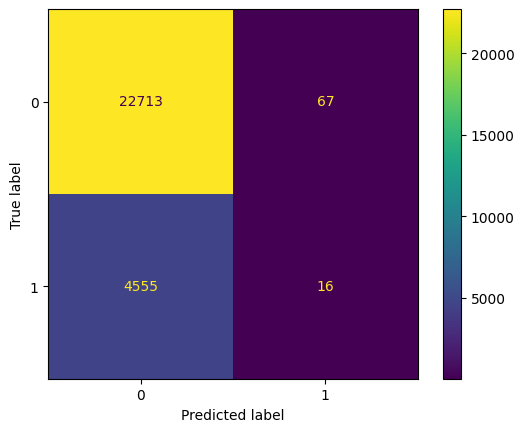

In [149]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_hat)
print(cnf_matrix)
metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix).plot()

#  True predicted which were True 22713 and False which were false 16
# major issue we predicted  false but they were actually true

#### Feature Selection using RFE

In [150]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [151]:
from sklearn.feature_selection import RFE
def sm_model_evaluation (model, x_test, y_test, columns):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test[columns])
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test.y, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

# as south of 20 values remains constant
for i in range(5, 20):
    rfe = RFE(log_reg,n_features_to_select= i)           # running RFE with 20 variable output.
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print ("=====================================================")
    print (i)
    sm_model_evaluation (res, X_test, y_test, col)

c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

5
0.8328763116522248
[[22155   625]
 [ 3946   625]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

6
0.8330591203246682
[[22184   596]
 [ 3970   601]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

7
0.8330225585901795
[[22182   598]
 [ 3969   602]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

8
0.8326569412452927
[[22158   622]
 [ 3955   616]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

9
0.833534422873021
[[22198   582]
 [ 3971   600]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

10
0.8352528243939893
[[22671   109]
 [ 4397   174]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

11
0.8352528243939893
[[22671   109]
 [ 4397   174]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

12
0.8351065774560346
[[22669   111]
 [ 4399   172]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

13
0.8351797009250119
[[22670   110]
 [ 4398   173]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

14
0.8345947131731929
[[22640   140]
 [ 4384   187]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

15
0.8345947131731929
[[22636   144]
 [ 4380   191]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

16
0.8345947131731929
[[22635   145]
 [ 4379   192]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

17
0.8345947131731929
[[22635   145]
 [ 4379   192]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

18
0.8346678366421703
[[22650   130]
 [ 4392   179]]


c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\sahil\code\upgrad\assignment\Capstone\env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

19
0.8347775218456364
[[22656   124]
 [ 4395   176]]


In [152]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [153]:
col 

Index(['C1', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C18',
       'C20', 'dayofweek', 'day', 'hour', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'banner_pos_0', 'banner_pos_1',
       'banner_pos_7'],
      dtype='object')

In [154]:
# Now doing feature elimination with VIF as RFE Does not check for correlation
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [155]:
vif

,Features,VIF
0,C1,1985.79
16,banner_pos_0,1179.68
17,banner_pos_1,458.87
4,C15,197.13
9,day,82.11
3,C14,70.93
14,app_domain,35.24
15,app_category,33.57
13,app_id,26.44
12,site_category,21.41


In [156]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

X_sm = sm.add_constant(X_test[col])
y_pred = res.predict(X_sm)
y_train_pred_final = pd.DataFrame({'y':y_test.y, 'y_Prob':y_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )

0.8347775218456364


### End Logistic Regression

In [157]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                91170 non-null  int64 
 1   banner_pos        91170 non-null  int64 
 2   site_id           91170 non-null  object
 3   site_domain       91170 non-null  object
 4   site_category     91170 non-null  object
 5   app_id            91170 non-null  object
 6   app_domain        91170 non-null  object
 7   app_category      91170 non-null  object
 8   device_type       91170 non-null  int64 
 9   device_conn_type  91170 non-null  int64 
 10  C14               91170 non-null  int64 
 11  C15               91170 non-null  int64 
 12  C16               91170 non-null  int64 
 13  C18               91170 non-null  int64 
 14  C20               91170 non-null  int64 
 15  dayofweek         91170 non-null  int64 
 16  day               91170 non-null  int64 
 17  hour        

In [160]:
# Coverting categorical into labelled dataset as in rf and dt nomianal and ordinal does not matter
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
col_list = df.select_dtypes(include='object').columns
for column in col_list:
  df_dataset[col] = label_encoder.fit_transform(df_dataset[column])


In [162]:
df_dataset.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C18', 'C20', 'dayofweek', 'day', 'hour', 'y',
       'device_model'],
      dtype='object')

In [164]:
df_dataset.info()
# now the data is ready . Next uo spliting the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   C1                91170 non-null  int64
 1   banner_pos        91170 non-null  int64
 2   site_id           91170 non-null  int32
 3   site_domain       91170 non-null  int32
 4   site_category     91170 non-null  int32
 5   app_id            91170 non-null  int32
 6   app_domain        91170 non-null  int32
 7   app_category      91170 non-null  int32
 8   device_type       91170 non-null  int64
 9   device_conn_type  91170 non-null  int64
 10  C14               91170 non-null  int64
 11  C15               91170 non-null  int64
 12  C16               91170 non-null  int64
 13  C18               91170 non-null  int64
 14  C20               91170 non-null  int64
 15  dayofweek         91170 non-null  int64
 16  day               91170 non-null  int64
 17  hour              91170 non-nul

In [172]:
y.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91170 entries, 0 to 99998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       91170 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [173]:
y =df_dataset['y']
X =df_dataset.drop('y',axis=1)

In [175]:
# Cross check
y.shape


(91170,)

In [178]:
X.shape

(91170, 19)

In [179]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [181]:
# Cross check
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63819, 19)
(27351, 19)
(63819,)
(27351,)


In [182]:
y_train.head(10)

86450    1
3964     0
67950    0
53301    0
18216    0
99440    1
21144    0
5159     0
58205    1
42152    0
Name: y, dtype: int64

In [183]:
from sklearn.tree import DecisionTreeClassifier
dt_basic = DecisionTreeClassifier()

In [185]:
from sklearn import set_config
set_config(print_changed_only=False)

In [186]:
dt_basic

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [187]:
dt_basic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [188]:
y_preds= dt_basic.predict(X_train)

In [189]:
accuracy_value_on_training = metrics.accuracy_score(y_train,y_preds)

In [190]:
accuracy_value_on_training

0.9478838590388442

In [191]:
# On test then
y_preds= dt_basic.predict(X_test)
accuracy_value_on_training = metrics.accuracy_score(y_test,y_preds)

In [192]:
accuracy_value_on_training
# Overfitting maybe

0.7663705166173084

In [193]:
# confusion matrix
metrics.confusion_matrix(y_test,y_preds)

array([[19939,  2841],
       [ 3549,  1022]], dtype=int64)

In [195]:
print(metrics.classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     22780
           1       0.26      0.22      0.24      4571

    accuracy                           0.77     27351
   macro avg       0.56      0.55      0.55     27351
weighted avg       0.75      0.77      0.76     27351



In [197]:
dt_basic.tree_.node_count
# Damm soo many nodes visualization wont make sense as nodes are too much in number

29991